# Here we are Predict the Patient Heart Atteack or Not

## Domain Analysis

In [1]:
import numpy as np  # Use for Numerical Function 
import pandas as pd  # Use for Data Cleaning and Data Analysis
import matplotlib.pyplot as plt  # use for Data Visualization
import seaborn as sns  # use for Data Visualization
import warnings # use for ignore the warning
warnings.filterwarnings("ignore")

In [2]:
# Use for Load the Dataset
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Business Analysis:-
* Here we are predict the Healthcare dataset basically patient data based predict come Heart Attack or Not.
* Like data set value age, sex, cp, trtbps, col, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall	columns.

#### Insights:-
* 1.age: The age of the patient.
* 2.sex: The gender of the patient (typically 1 = male, 0 = female).
* 3.cp (chest pain type): Type of chest pain experienced by the patient (values typically range from 0 to 3, with 0 = typical angina, 1 = atypical * * 4.angina, 2 = non-anginal pain, 3 = asymptomatic).
* 5.trtbps (resting blood pressure): Resting blood pressure of the patient (in mm Hg).
* 6.chol (serum cholesterol): Cholesterol level in mg/dl.
* 7.fbs (fasting blood sugar): Indicates if the patient's fasting blood sugar is > 120 mg/dl (1 = true, 0 = false).
* 8.restecg (resting electrocardiographic results): Results of the resting ECG (values typically range from 0 to 2, with 0 = normal, 1 = having ST-T * 9.wave abnormality, 2 = showing probable or definite left ventricular hypertrophy).
* 10.thalachh (maximum heart rate achieved): The maximum heart rate achieved by the patient during physical activity.
* 11.exng (exercise-induced angina): Indicates whether the patient experiences angina as a result of exercise (1 = yes, 0 = no).
* 12.oldpeak: ST depression induced by exercise relative to rest.
* 13slp (slope): The slope of the peak exercise ST segment (values typically range from 0 to 2, with 0 = upsloping, 1 = flat, 2 = downsloping).
* 14.caa (number of major vessels colored by fluoroscopy): The number of major vessels (0-3) colored by fluoroscopy.
* 15.thall: Thallium stress test result (3 = normal, 6 = fixed defect, 7 = reversible defect).
* 16.output: The target variable indicating the presence or absence of heart disease (typically 0 = no heart disease, 1 = heart disease).

## Basic Check

In [3]:
data.head() # Showning Top 5 rows

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail() # Showning Last 5 rows

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
data.describe() # use for catinous column function value show

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


* Here we can see the min age is 29 and max is 77.

In [6]:
data.info() # use for dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## EDA:- Exploratory Data Analysis

In [7]:
for column in data: # use for data column store
    print(column)

age
sex
cp
trtbps
chol
fbs
restecg
thalachh
exng
oldpeak
slp
caa
thall
output


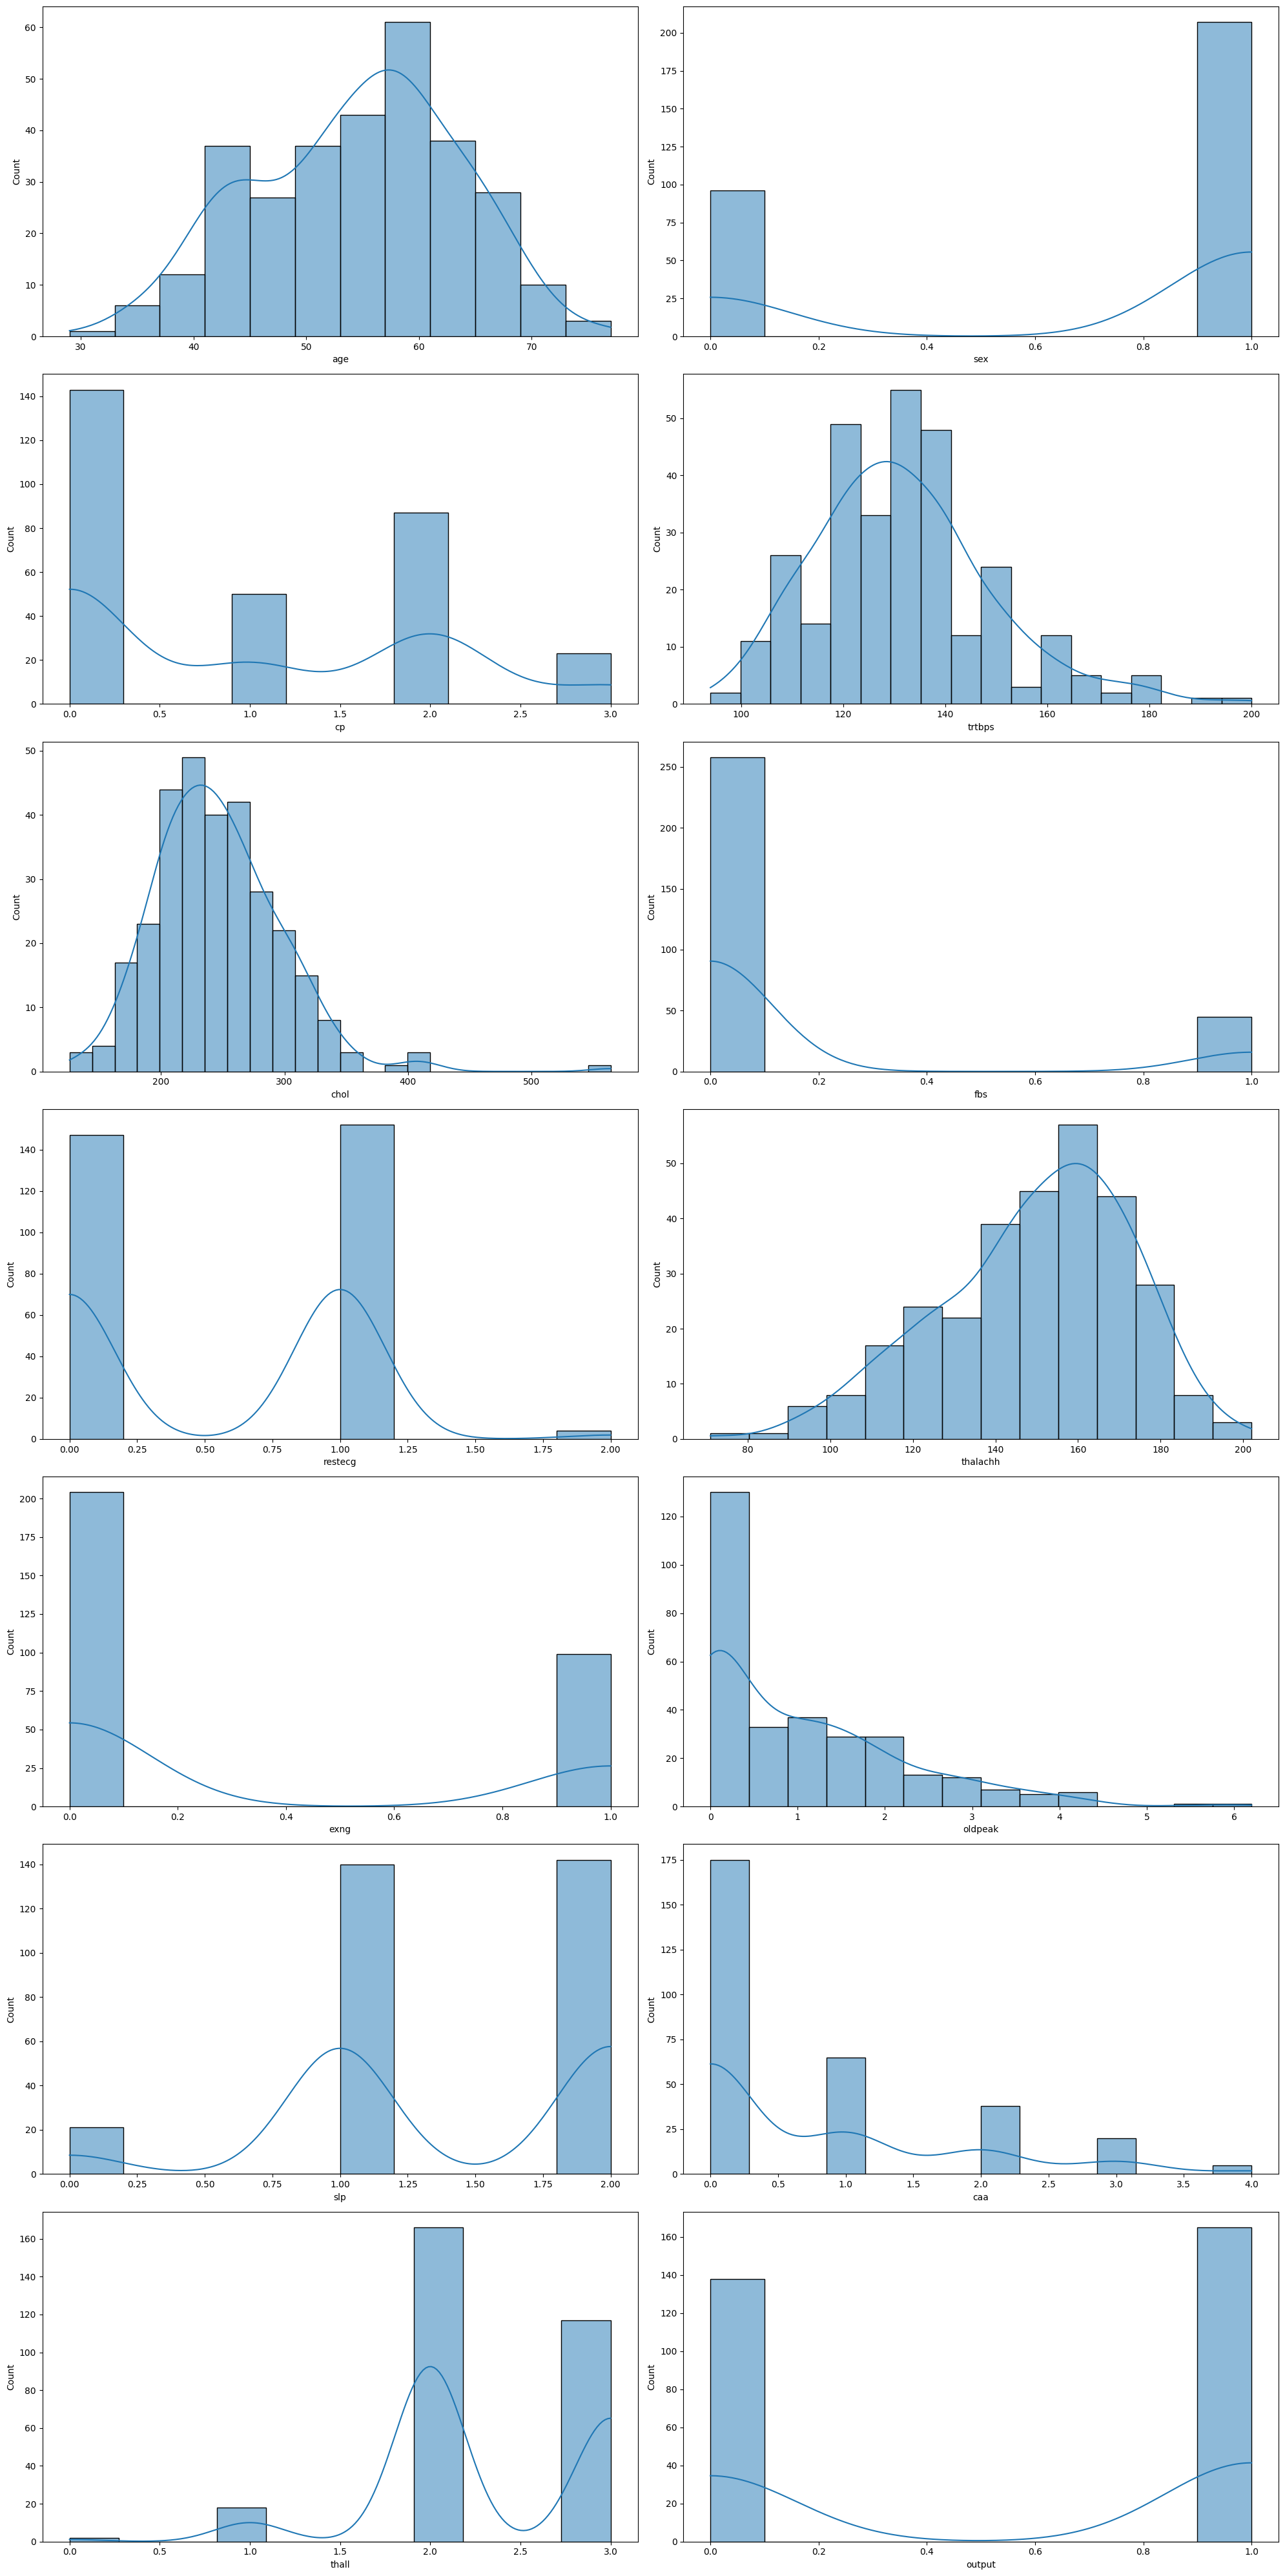

In [8]:
# use for Univeriant Analysis
plt.figure(figsize=(20,40)) # plot size create
plt_num = 1
for column in data:
    if plt_num <= 14:
        plt.subplot(7,2,plt_num)
        sns.histplot(data[column],kde=True) # create a histpplot use for check the distribution
        plt.xlabel(column)
    plt_num += 1
plt.tight_layout()

* Here we can not showing the Normal Diastribution.

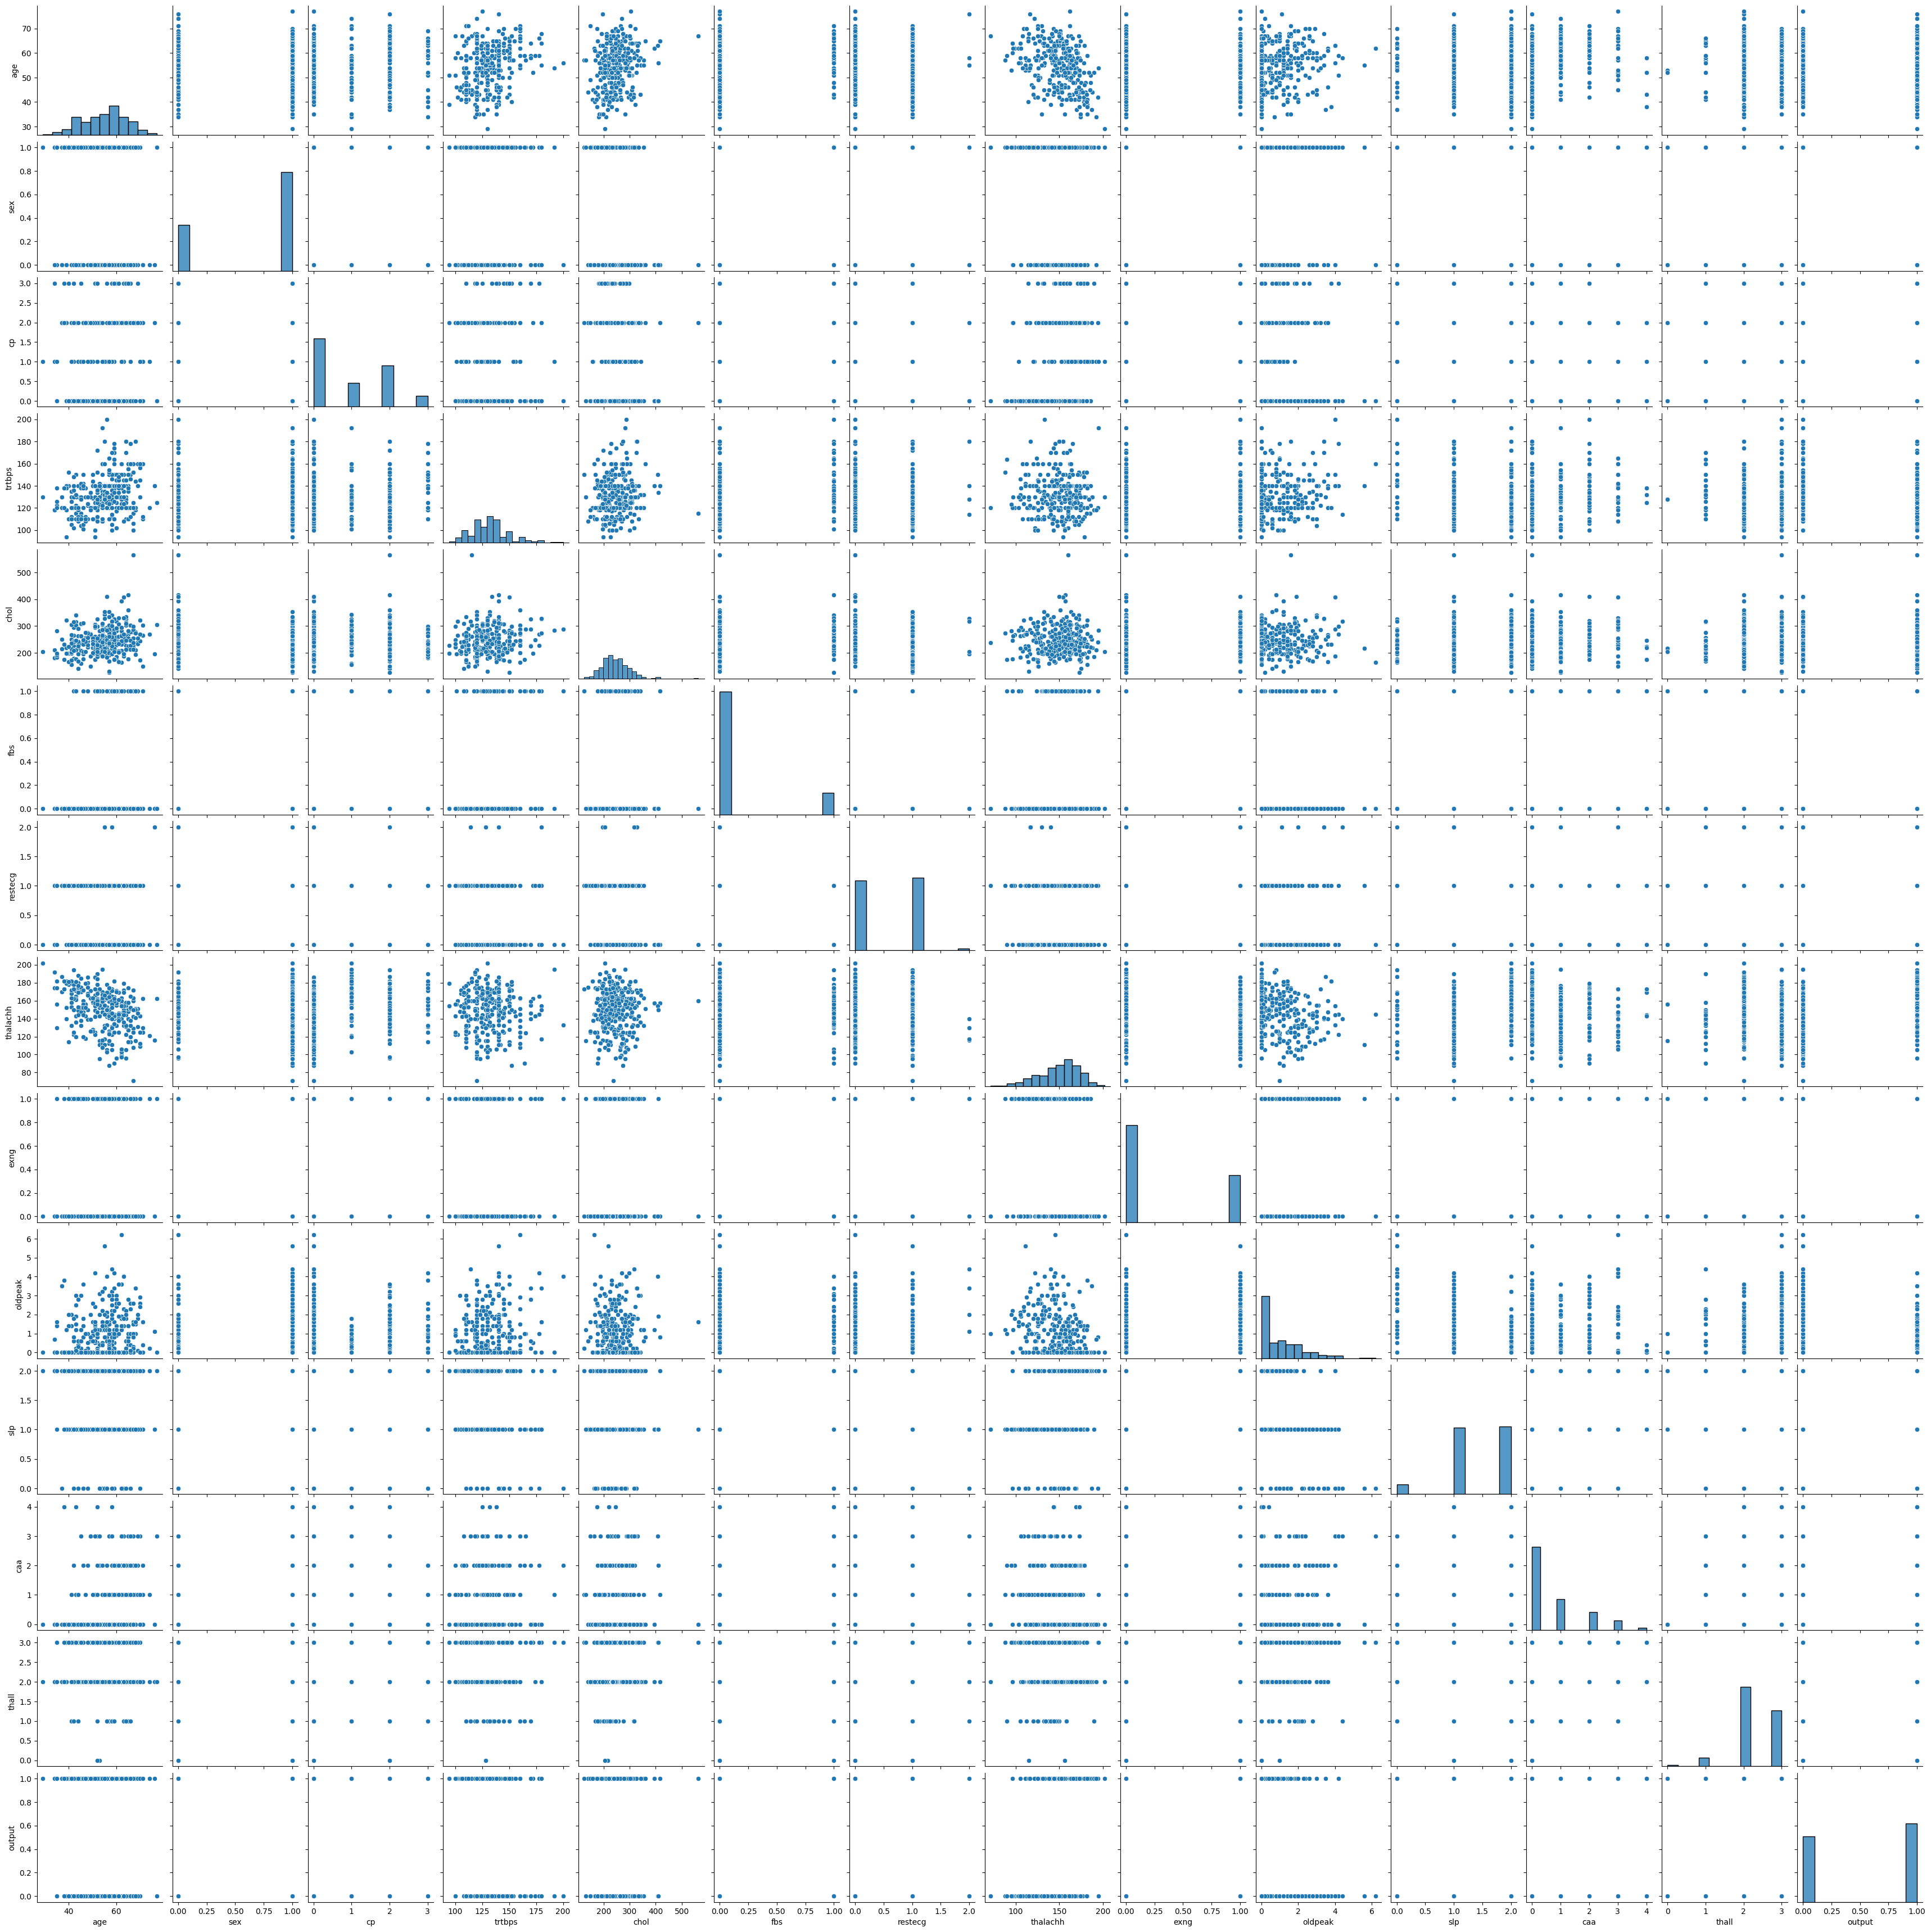

In [9]:
# use for Multiveriant Analysis
sns.pairplot(data) 

## Data Processing

In [10]:
data.isnull().sum() # use for check the null values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

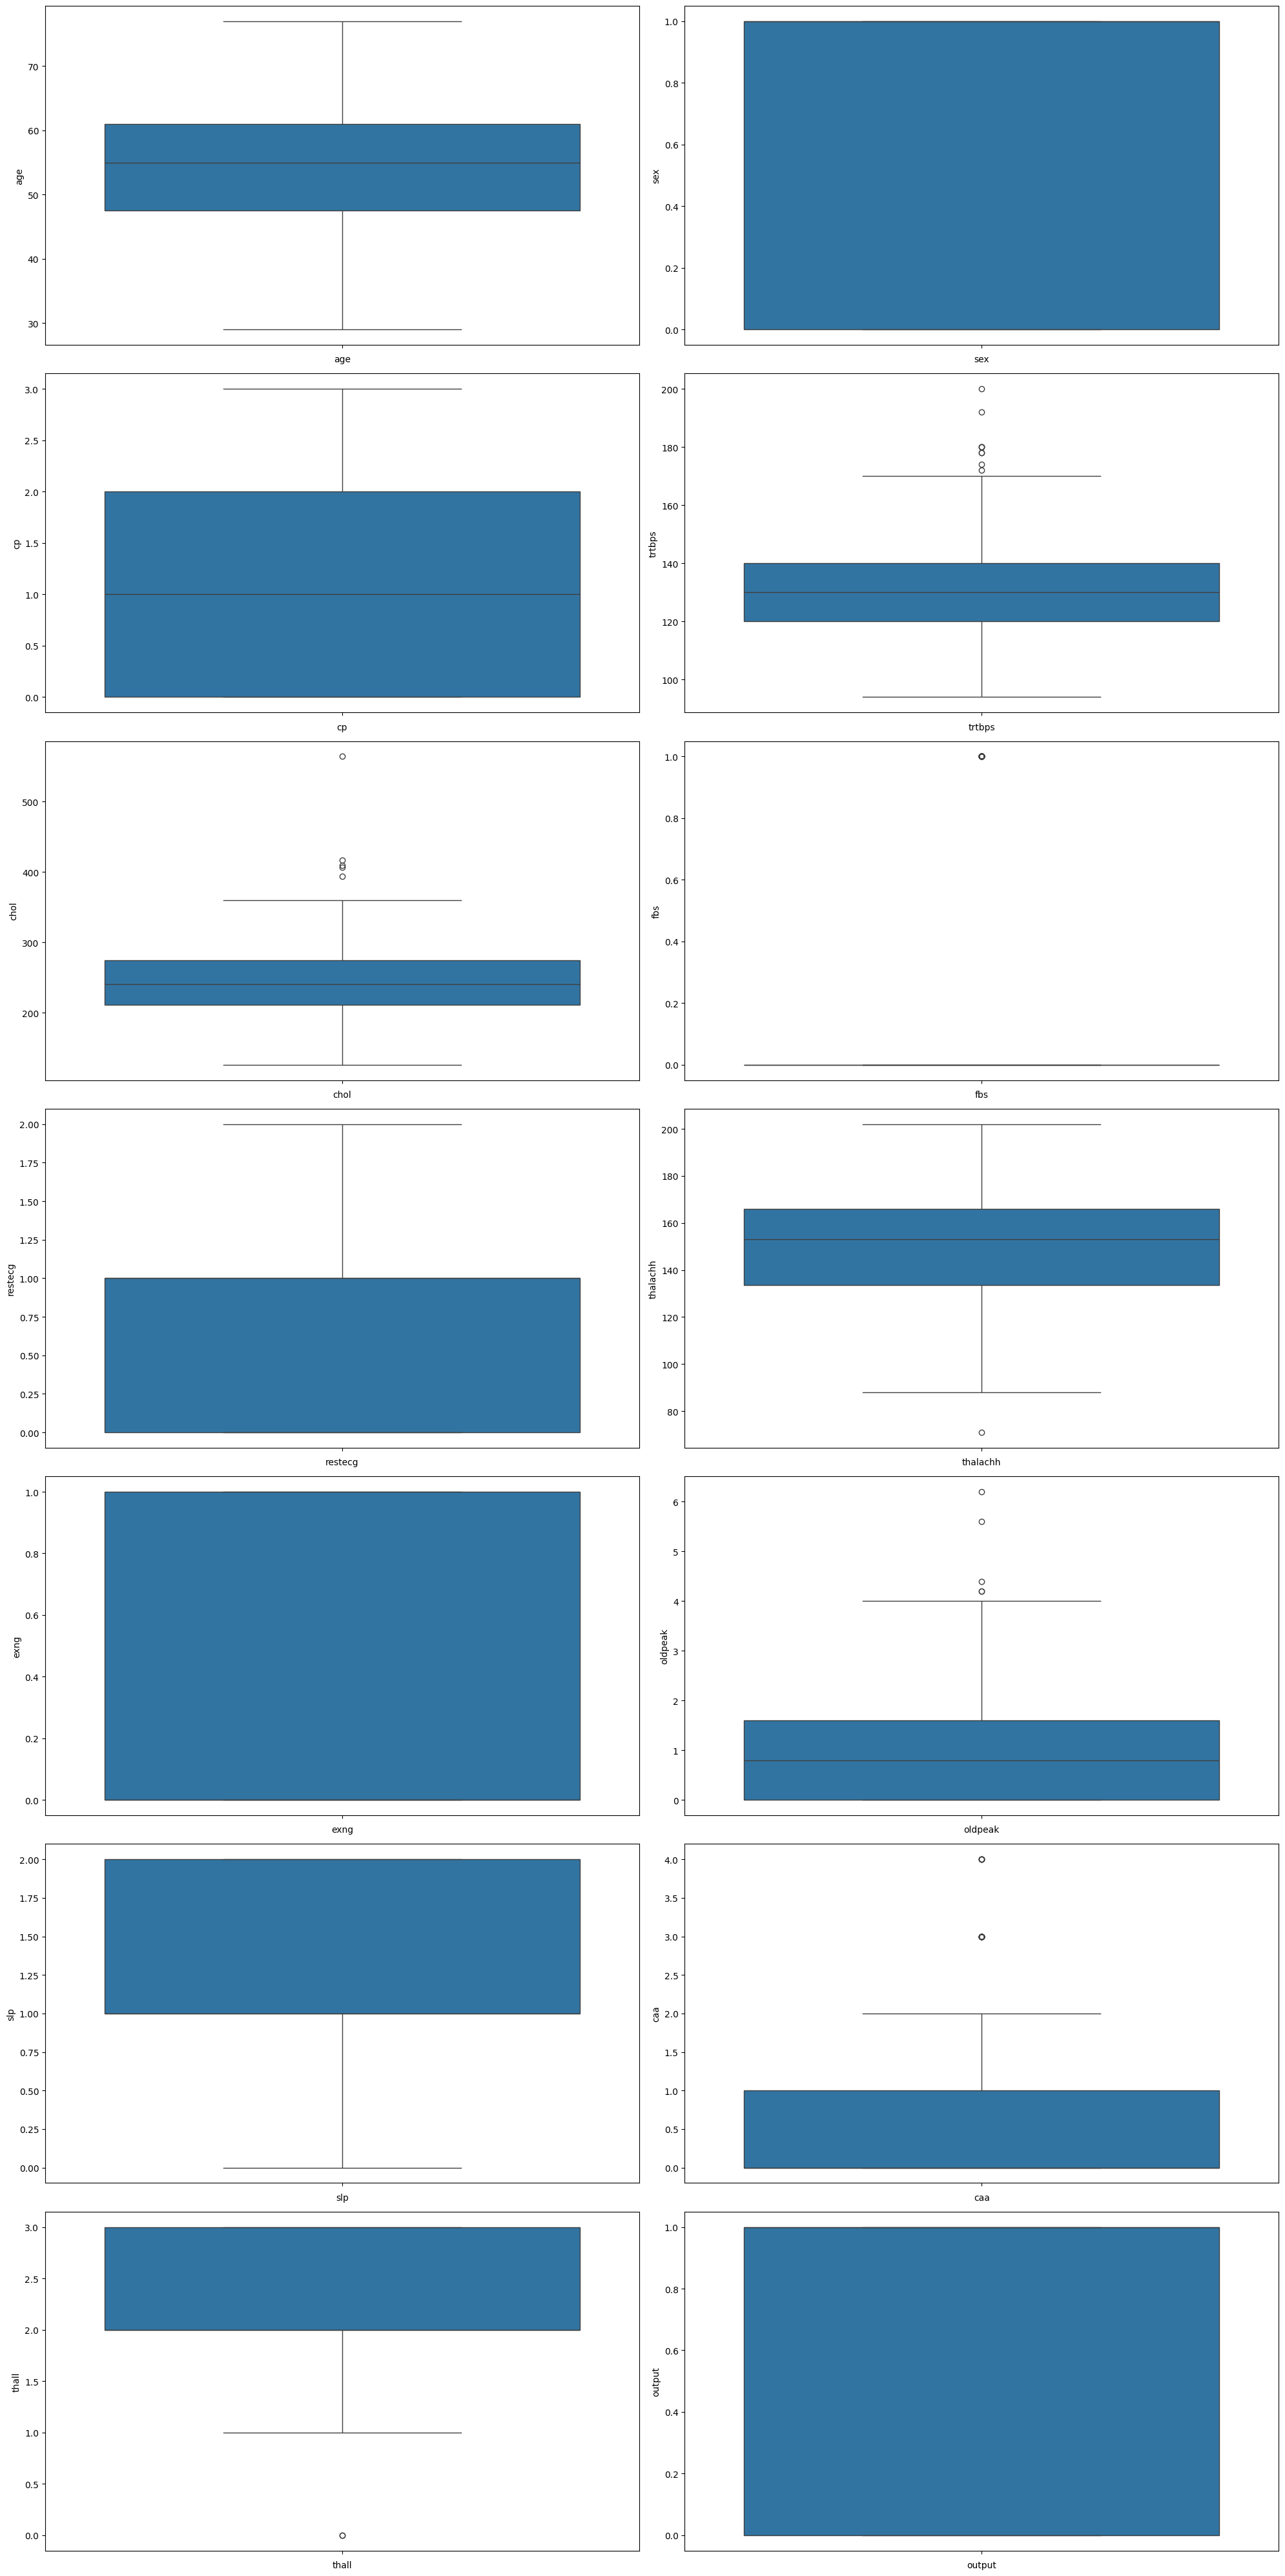

In [11]:
plt.figure(figsize=(20,40)) # create plot size
plt_num = 1
for column in data:
    if plt_num <= 14:
        plt.subplot (7,2,plt_num)
        sns.boxplot(data[column]) # use for check the outliers
        plt.xlabel(column)
    plt_num += 1
plt.tight_layout()

* Here we can see the outliers in trtbps, chol, thalachh, oldpeak, caa, thall columns.

In [12]:
data.columns # showing all columns name

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

<Axes: xlabel='age'>

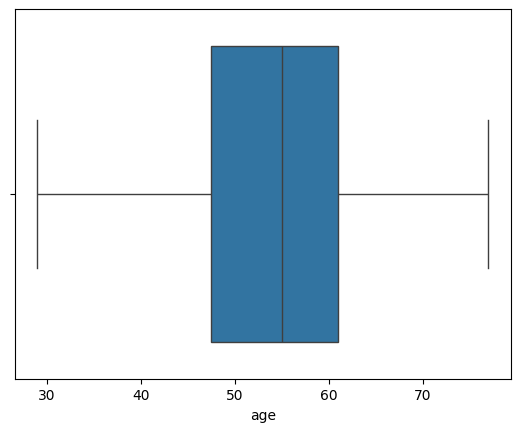

In [13]:
sns.boxplot(x = data.age) # check the outliers

<Axes: xlabel='sex'>

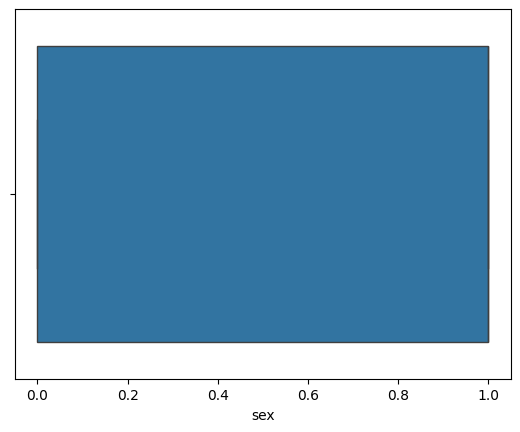

In [14]:
sns.boxplot(x = data.sex) # check the outliers

<Axes: xlabel='cp'>

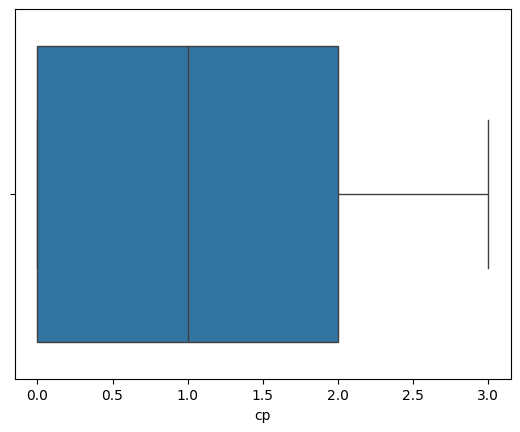

In [15]:
sns.boxplot(x = data.cp) # check the outliers

<Axes: xlabel='trtbps'>

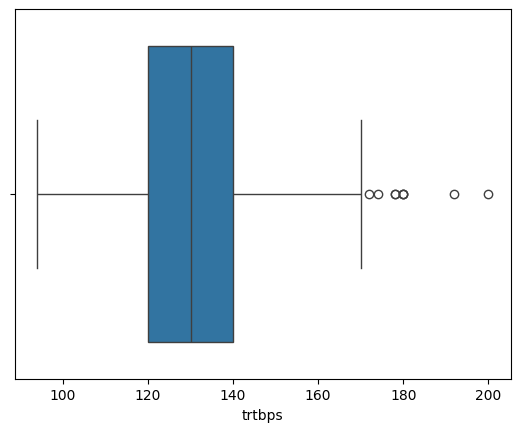

In [16]:
sns.boxplot(x = data.trtbps) # check the outliers

In [17]:
data.trtbps.median() # check the median value

130.0

In [18]:
data.loc[data["trtbps"] >= 170,"trtbps"] = 130.0 # Handle the missing value

<Axes: xlabel='trtbps'>

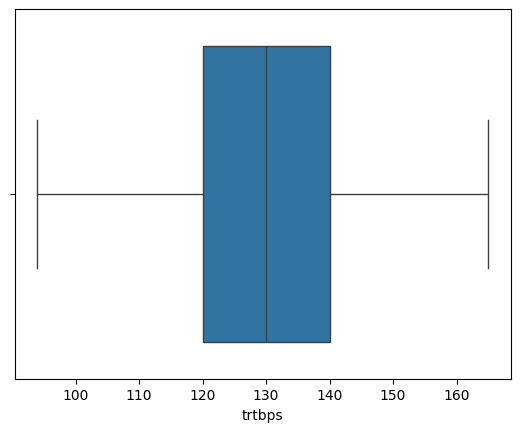

In [19]:
sns.boxplot(x = data.trtbps) # check the outliers

<Axes: xlabel='chol'>

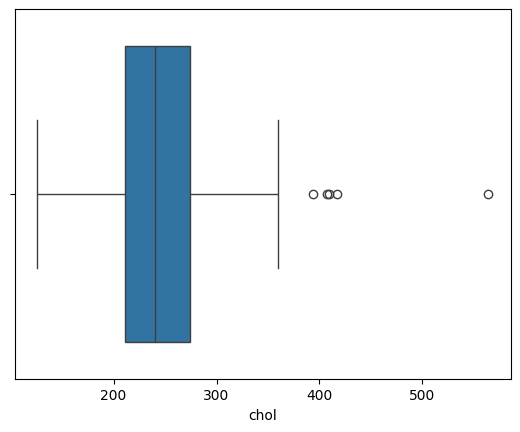

In [20]:
sns.boxplot(x = data.chol) # check the outliers

In [21]:
data.chol.median() # check the median

240.0

In [22]:
data.loc[data["chol"] >= 390,"chol"] = 240.0  # Handle the Missing Value 

<Axes: xlabel='chol'>

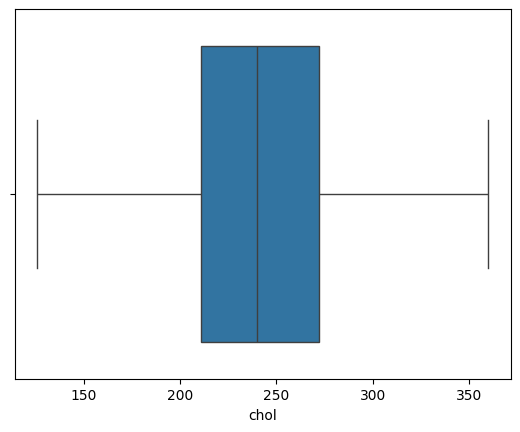

In [23]:
sns.boxplot(x = data.chol) # check the outliers

<Axes: xlabel='restecg'>

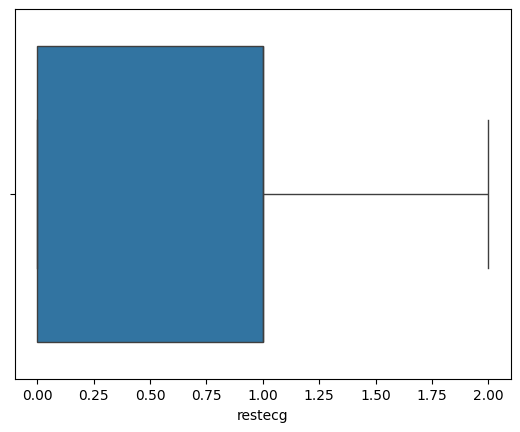

In [24]:
sns.boxplot(x = data.restecg) # check the outliers

<Axes: xlabel='thalachh'>

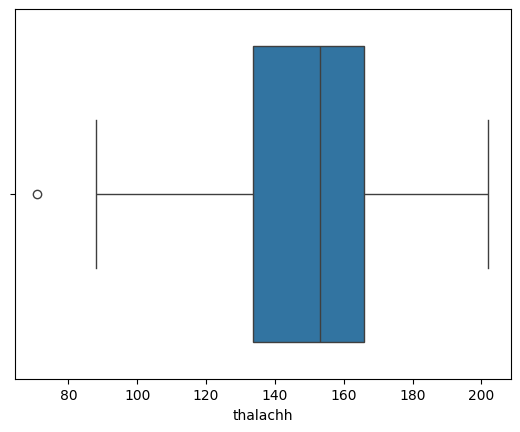

In [25]:
sns.boxplot(x = data.thalachh) # check the outliers

In [26]:
data.thalachh.median() # check the median

153.0

In [27]:
data.loc[data["thalachh"] <= 90,"thalachh"] = 153.0 # Handle the missing value

<Axes: xlabel='thalachh'>

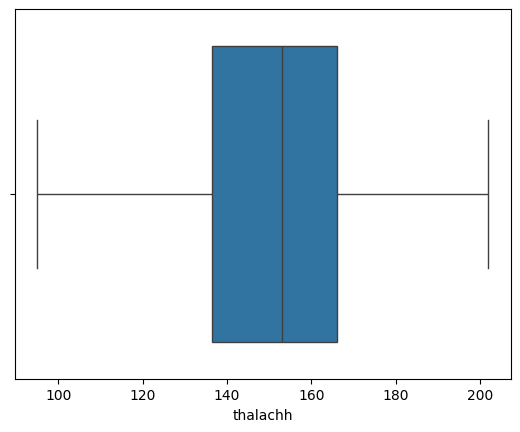

In [28]:
sns.boxplot(x = data.thalachh) # check the outliers

<Axes: xlabel='exng'>

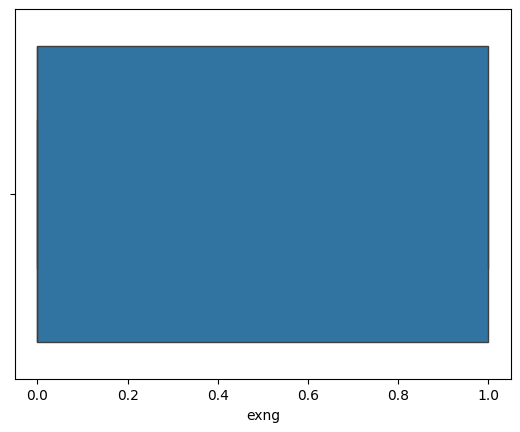

In [29]:
sns.boxplot(x = data.exng) # check the outliers

<Axes: xlabel='oldpeak'>

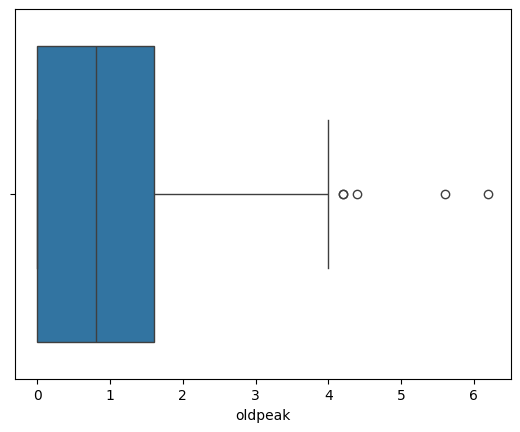

In [30]:
sns.boxplot(x = data.oldpeak)  # check the outliers

In [31]:
data.oldpeak.median()  # check the median

0.8

In [32]:
data.loc[data["oldpeak"] >= 4,"oldpeak"] = 0.8 # Handle the missing value

<Axes: xlabel='oldpeak'>

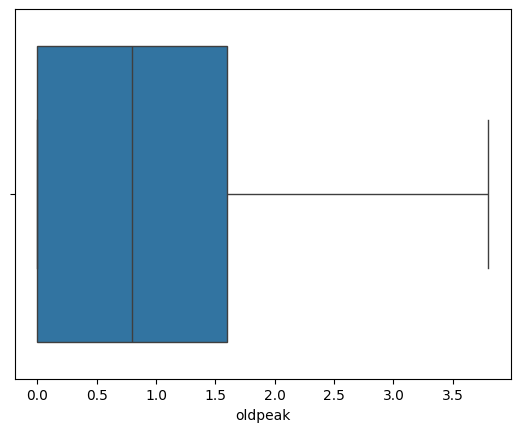

In [33]:
sns.boxplot(x = data.oldpeak) # check the outliers

<Axes: xlabel='slp'>

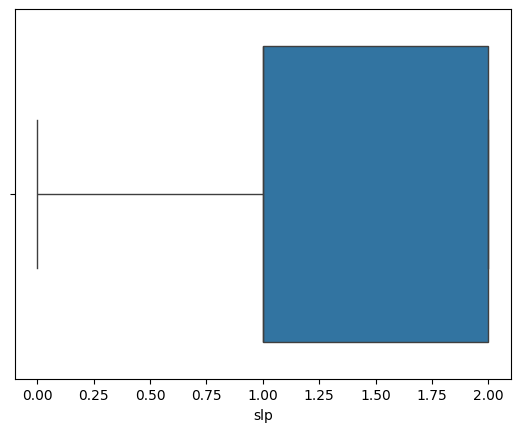

In [34]:
sns.boxplot(x = data.slp) # check the outliers

<Axes: xlabel='caa'>

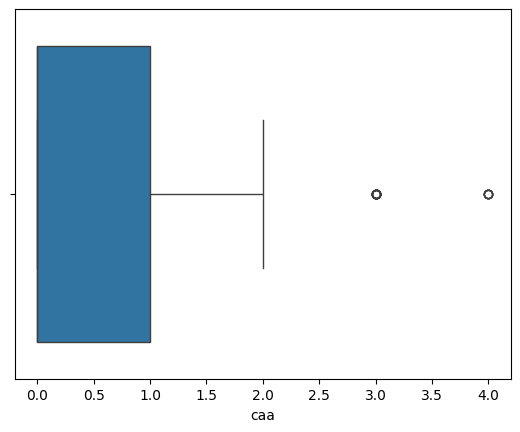

In [35]:
sns.boxplot(x = data.caa) # check the outliers

In [36]:
data.caa.median() # check the median

0.0

In [37]:
data.caa.unique() # find the unique value

array([0, 2, 1, 3, 4], dtype=int64)

<Axes: xlabel='thall'>

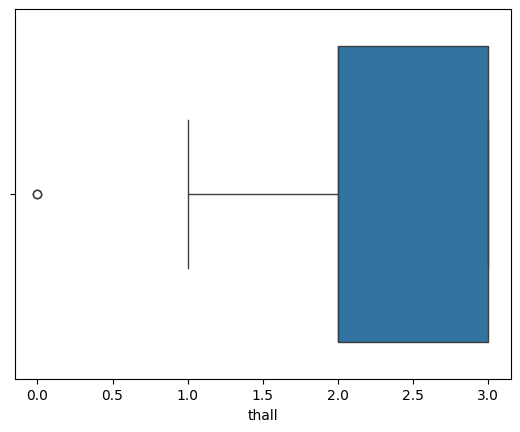

In [38]:
sns.boxplot(x = data.thall) # check the outliers

In [39]:
data.thall.unique() # find the unique value

array([1, 2, 3, 0], dtype=int64)

In [40]:
data.thall.median() # check the median

2.0

In [41]:
data.loc[data["thall"] <= 0,"thall"] = 2.0 # Hanlde the Missing Value

<Axes: xlabel='thall'>

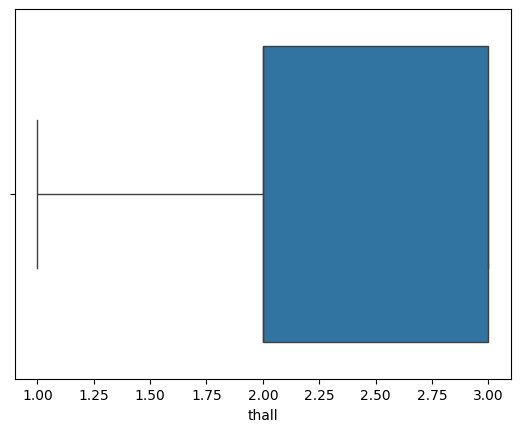

In [42]:
sns.boxplot(x = data.thall) # check the outliers

<Axes: xlabel='output'>

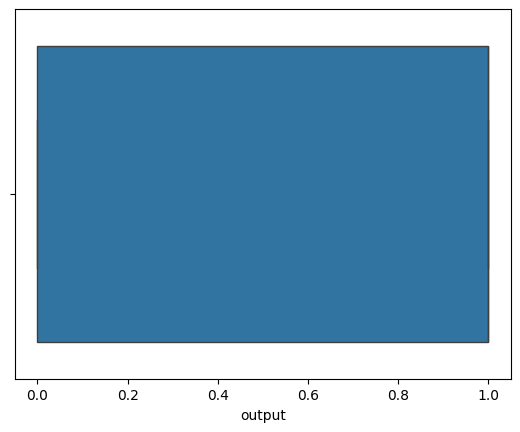

In [43]:
sns.boxplot(x = data.output) # check the outliers

## Feature Engineering

In [44]:
data.head() # Showning the Top 5 value

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: >

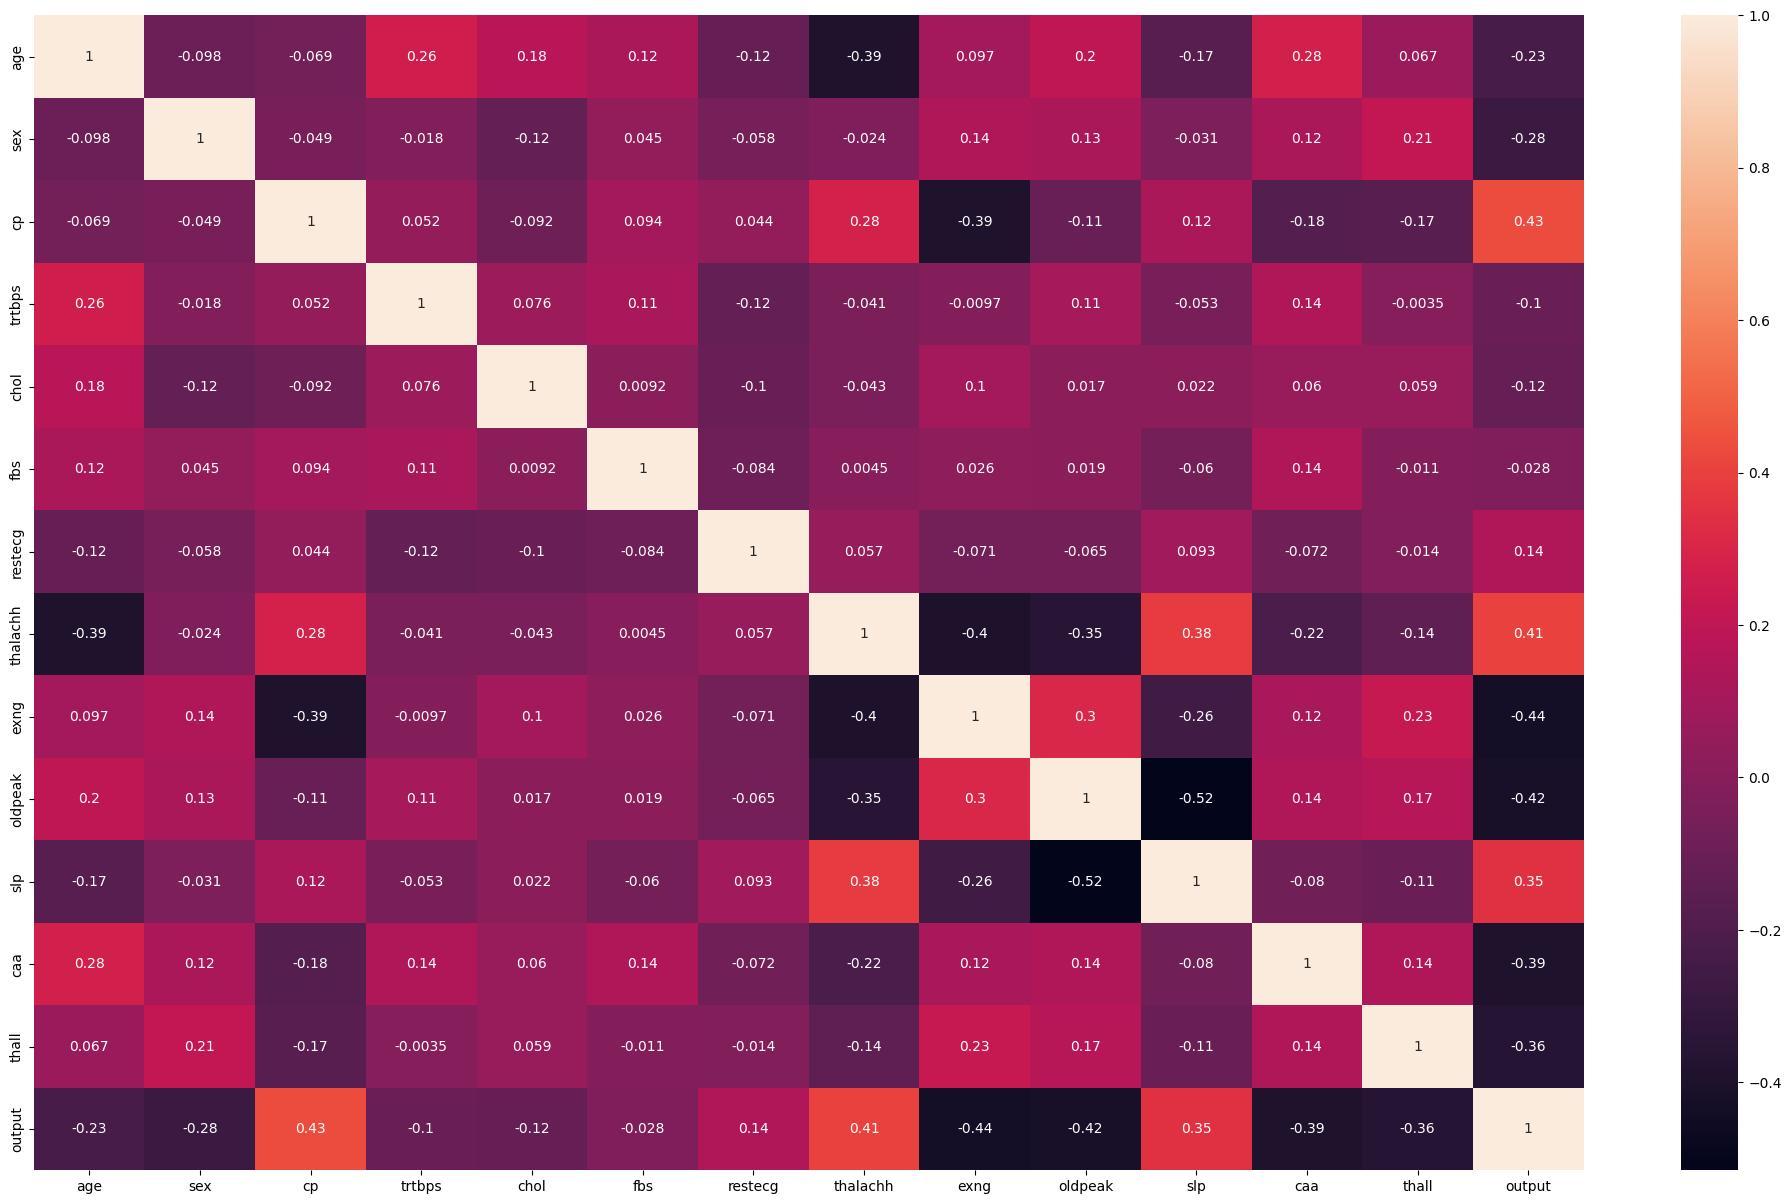

In [45]:
# find the corealtion between columns
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(),annot=True) # craete a heatmap plot

In [46]:
data.corr() # create a heatmap plot

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.262293,0.175342,0.121308,-0.116211,-0.391930,0.096801,0.200111,-0.168814,0.276326,0.066745,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.017668,-0.121806,0.045032,-0.058196,-0.024457,0.141664,0.127941,-0.030711,0.118261,0.211652,-0.280937
cp,-0.068653,-0.049353,1.000000,0.052033,-0.092265,0.094444,0.044421,0.279639,-0.394280,-0.112748,0.119717,-0.181053,-0.169125,0.433798
trtbps,0.262293,-0.017668,0.052033,1.000000,0.075658,0.114602,-0.119015,-0.040604,-0.009722,0.106331,-0.053444,0.140763,-0.003497,-0.102804
chol,0.175342,-0.121806,-0.092265,0.075658,1.000000,0.009208,-0.101369,-0.043403,0.102073,0.016658,0.021603,0.060491,0.059137,-0.115910
fbs,0.121308,0.045032,0.094444,0.114602,0.009208,1.000000,-0.084189,0.004544,0.025665,0.018695,-0.059894,0.137979,-0.011209,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.119015,-0.101369,-0.084189,1.000000,0.056541,-0.070733,-0.065051,0.093045,-0.072042,-0.013795,0.137230
thalachh,-0.391930,-0.024457,0.279639,-0.040604,-0.043403,0.004544,0.056541,1.000000,-0.397436,-0.353201,0.384032,-0.217408,-0.137904,0.406512
exng,0.096801,0.141664,-0.394280,-0.009722,0.102073,0.025665,-0.070733,-0.397436,1.000000,0.302502,-0.257748,0.115739,0.225508,-0.436757
oldpeak,0.200111,0.127941,-0.112748,0.106331,0.016658,0.018695,-0.065051,-0.353201,0.302502,1.000000,-0.515400,0.137438,0.170195,-0.415136


## Logistic Regression

In [47]:
data.head() # Showning Top 5 Value

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
# craete a independent and dependent variable
x = data.drop("output",axis=1) # drop the columns
y = data.output

In [49]:
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [50]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [51]:
# Data Tranfore to the certain range use Scaller
from sklearn.preprocessing import MinMaxScaler
SE = MinMaxScaler()
df = SE.fit_transform(x)

In [52]:
df

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.5       ],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.5       ],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.5       ]])

In [53]:
x.columns # show all column name

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

In [54]:
# store scall data in Dataframe
data1 = pd.DataFrame(data = df,columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'])

In [55]:
data1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1.0,1.000000,0.718310,0.457265,1.0,0.0,0.514019,0.0,0.605263,0.0,0.00,0.0
1,0.166667,1.0,0.666667,0.507042,0.529915,0.0,0.5,0.859813,0.0,0.921053,0.0,0.00,0.5
2,0.250000,0.0,0.333333,0.507042,0.333333,0.0,0.0,0.719626,0.0,0.368421,1.0,0.00,0.5
3,0.562500,1.0,0.333333,0.366197,0.470085,0.0,0.5,0.775701,0.0,0.210526,1.0,0.00,0.5
4,0.583333,0.0,0.000000,0.366197,0.974359,0.0,0.5,0.635514,1.0,0.157895,1.0,0.00,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.647887,0.491453,0.0,0.5,0.261682,1.0,0.052632,0.5,0.00,1.0
299,0.333333,1.0,1.000000,0.225352,0.589744,0.0,0.5,0.345794,0.0,0.315789,0.5,0.00,1.0
300,0.812500,1.0,0.000000,0.704225,0.286325,1.0,0.5,0.429907,0.0,0.894737,0.5,0.50,1.0
301,0.583333,1.0,0.000000,0.507042,0.021368,0.0,0.5,0.186916,1.0,0.315789,0.5,0.25,1.0


In [56]:
# store the Independent and dependent Variable
x1 = data1 
y1 = data.output

In [57]:
x1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1.0,1.000000,0.718310,0.457265,1.0,0.0,0.514019,0.0,0.605263,0.0,0.00,0.0
1,0.166667,1.0,0.666667,0.507042,0.529915,0.0,0.5,0.859813,0.0,0.921053,0.0,0.00,0.5
2,0.250000,0.0,0.333333,0.507042,0.333333,0.0,0.0,0.719626,0.0,0.368421,1.0,0.00,0.5
3,0.562500,1.0,0.333333,0.366197,0.470085,0.0,0.5,0.775701,0.0,0.210526,1.0,0.00,0.5
4,0.583333,0.0,0.000000,0.366197,0.974359,0.0,0.5,0.635514,1.0,0.157895,1.0,0.00,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.647887,0.491453,0.0,0.5,0.261682,1.0,0.052632,0.5,0.00,1.0
299,0.333333,1.0,1.000000,0.225352,0.589744,0.0,0.5,0.345794,0.0,0.315789,0.5,0.00,1.0
300,0.812500,1.0,0.000000,0.704225,0.286325,1.0,0.5,0.429907,0.0,0.894737,0.5,0.50,1.0
301,0.583333,1.0,0.000000,0.507042,0.021368,0.0,0.5,0.186916,1.0,0.315789,0.5,0.25,1.0


In [58]:
y1

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split # split the data train and test
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=40)

In [60]:
x_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
69,0.687500,0.0,0.000000,0.422535,0.354701,0.0,0.5,0.635514,0.0,0.000000,1.0,0.00,0.5
118,0.354167,0.0,0.333333,0.154930,0.333333,0.0,0.5,0.719626,0.0,0.000000,1.0,0.00,0.5
49,0.500000,0.0,0.000000,0.619718,0.461538,0.0,0.0,0.607477,0.0,0.000000,1.0,0.00,0.5
16,0.604167,0.0,0.666667,0.366197,0.914530,0.0,0.5,0.719626,0.0,0.000000,1.0,0.00,0.5
54,0.708333,0.0,0.666667,0.577465,0.538462,0.0,0.0,0.719626,0.0,0.000000,1.0,0.00,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,0.520833,1.0,0.000000,0.394366,0.683761,0.0,0.0,0.196262,1.0,0.842105,0.5,0.50,0.5
193,0.645833,1.0,0.000000,0.718310,0.666667,0.0,0.0,0.439252,1.0,0.736842,0.5,0.50,1.0
165,0.791667,1.0,0.000000,0.929577,0.683761,0.0,0.0,0.121495,1.0,0.394737,0.5,0.75,0.5
7,0.312500,1.0,0.333333,0.366197,0.585470,0.0,0.5,0.728972,0.0,0.000000,1.0,0.00,1.0


In [61]:
x_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
18,0.291667,1.0,0.000000,0.788732,0.517094,0.0,0.5,0.710280,0.0,0.394737,1.0,0.00,0.5
112,0.729167,0.0,0.666667,0.647887,0.799145,0.0,0.5,0.355140,0.0,0.052632,1.0,0.00,1.0
102,0.708333,0.0,0.333333,0.647887,0.294872,0.0,0.5,0.785047,0.0,0.000000,1.0,0.50,0.5
275,0.479167,1.0,0.000000,0.436620,0.367521,0.0,0.5,0.682243,0.0,0.263158,1.0,0.50,1.0
92,0.479167,1.0,0.666667,0.619718,0.414530,0.0,0.5,0.691589,0.0,0.000000,1.0,1.00,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0.583333,1.0,0.000000,0.225352,0.893162,0.0,0.5,0.448598,1.0,0.789474,0.5,0.25,1.0
146,0.312500,0.0,0.666667,0.338028,0.495726,0.0,0.5,0.504673,0.0,0.078947,0.5,0.25,0.5
240,0.854167,1.0,0.666667,0.929577,0.611111,0.0,0.5,0.158879,1.0,0.763158,0.5,0.25,1.0
167,0.687500,0.0,0.000000,0.647887,0.606838,0.0,0.0,0.607477,0.0,0.947368,0.0,0.50,0.5


In [62]:
# Balance the Data Value
from imblearn.over_sampling import SMOTE
sm = SMOTE()
sm_x_train,sm_y_train = sm.fit_resample(x_train,y_train)

In [63]:
from collections import Counter # show the balance value
print("Before",Counter(y_train))
print("After",Counter(sm_y_train))

Before Counter({1: 130, 0: 112})
After Counter({1: 130, 0: 130})


In [64]:
# use the logistic Regression
from sklearn.linear_model import LogisticRegression 
LE = LogisticRegression()
LE.fit(sm_x_train,sm_y_train)

LogisticRegression()

In [65]:
y_lrpredict = LE.predict(x_test) # predict the data

In [66]:
y_lrpredict

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [67]:
y_test

18     1
112    1
102    1
275    0
92     1
      ..
288    0
146    1
240    0
167    0
90     1
Name: output, Length: 61, dtype: int64

In [68]:
# Import the Logistic Regression Metrics
from sklearn.metrics import accuracy_score,f1_score,classification_report,recall_score,precision_score,confusion_matrix 

In [69]:
accuracy_score(y_test,y_lrpredict) # Model Performeance

0.9016393442622951

In [70]:
f1_score(y_test,y_lrpredict) # trainig data accuracy

0.9166666666666666

In [71]:
print(classification_report(y_test,y_lrpredict)) # data Performance report

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.89      0.94      0.92        35

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61



## SVM:- Support Vectore Machine

In [72]:
from sklearn.svm import SVC # SVM model import
SV = SVC()
SV.fit(sm_x_train,sm_y_train) # train the data value

SVC()

In [73]:
y_smpredict = SV.predict(x_test) # Model test Predict

In [74]:
accuracy_score(y_test,y_smpredict) # model performance data accuracy

0.8524590163934426

In [75]:
f1_score(y_test,y_smpredict) # data training accuracy

0.8767123287671232

In [76]:
print(classification_report(y_test,y_smpredict)) # data Performance report

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.84      0.91      0.88        35

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



## Descision Tree Algorithm

In [77]:
from sklearn.tree import DecisionTreeClassifier # import decision tree model
DC = DecisionTreeClassifier()
DC.fit(sm_x_train,sm_y_train) # train the data

DecisionTreeClassifier()

In [78]:
y_dcpredict = DC.predict(x_test) # Model test Predict

In [79]:
accuracy_score(y_test,y_dcpredict) # model performance data accuracy

0.7868852459016393

In [80]:
f1_score(y_test,y_dcpredict) # data training accuracy

0.8115942028985508

In [81]:
print(classification_report(y_test,y_dcpredict)) # data Performance report

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        26
           1       0.82      0.80      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



## KNN Algorithm

In [82]:
from sklearn.neighbors import KNeighborsClassifier # import KNN model 
KNN = KNeighborsClassifier()
KNN.fit(sm_x_train,sm_y_train) # train the data

KNeighborsClassifier()

In [83]:
y_knnpredict = KNN.predict(x_test) # Model test Predict

In [84]:
accuracy_score(y_test,y_knnpredict)  # model performance data accuracy

0.8360655737704918

In [85]:
f1_score(y_test,y_knnpredict) # data training accuracy

0.8648648648648649

In [86]:
print(classification_report(y_test,y_knnpredict)) # data Performance report

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        26
           1       0.82      0.91      0.86        35

    accuracy                           0.84        61
   macro avg       0.84      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61



## Bagging Algorithm

In [87]:
from sklearn.ensemble import BaggingClassifier # import bagging model
model = LogisticRegression()
BG = BaggingClassifier(model, n_estimators=10, random_state=42)
BG.fit(sm_x_train,sm_y_train) # train the data

BaggingClassifier(estimator=LogisticRegression(), random_state=42)

In [88]:
y_bggpredict = BG.predict(x_test) # Model test Predict

In [89]:
accuracy_score(y_test,y_bggpredict)  # model performance data accuracy

0.9016393442622951

In [90]:
f1_score(y_test,y_bggpredict) # data training accuracy

0.9166666666666666

In [91]:
print(classification_report(y_test,y_bggpredict)) # data Performance report

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.89      0.94      0.92        35

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61



## Boosting Algorithm

In [92]:
from sklearn.ensemble import GradientBoostingClassifier # import gradiant model
GB = GradientBoostingClassifier()
GB.fit(sm_x_train,sm_y_train) # train the data

GradientBoostingClassifier()

In [93]:
y_gbpredict = GB.predict(x_test) # Model test Predict

In [94]:
accuracy_score(y_test,y_gbpredict)  # model performance data accuracy

0.7704918032786885

In [95]:
f1_score(y_test,y_gbpredict)  # data training accuracy

0.7878787878787878

In [96]:
print(classification_report(y_test,y_gbpredict)) # data Performance report

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        26
           1       0.84      0.74      0.79        35

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61



## Xtreame Gradiant Boosting`Algorithm

In [97]:
from xgboost import XGBClassifier # import XGB model
XB = XGBClassifier()
XB.fit(sm_x_train,sm_y_train) # train the data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [98]:
y_xgpredict = XB.predict(x_test) # Model test Predict

In [99]:
accuracy_score(y_test,y_xgpredict) # model performance data accuracy

0.8032786885245902

In [100]:
f1_score(y_test,y_xgpredict) # data training accuracy

0.8285714285714286

In [101]:
print(classification_report(y_test,y_xgpredict)) # data Performance report

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        26
           1       0.83      0.83      0.83        35

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



## AddaBoosting Algorithm

In [102]:
from sklearn.ensemble import AdaBoostClassifier # import the adaboost model
model = LogisticRegression()
AD = AdaBoostClassifier(model, n_estimators=50, random_state=42)
AD.fit(sm_x_train,sm_y_train) # train the data

AdaBoostClassifier(estimator=LogisticRegression(), random_state=42)

In [103]:
y_addpredict = AD.predict(x_test)  # Model test Predict

In [104]:
accuracy_score(y_test,y_addpredict) # model performance data accuracy

0.9180327868852459

In [105]:
f1_score(y_test,y_addpredict) # data training accuracy

0.9315068493150684

In [106]:
print(classification_report(y_test,y_addpredict)) # data Performance report

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.89      0.97      0.93        35

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



In [107]:
# Hyperparamter Tuning
from sklearn.model_selection import GridSearchCV # import gridsearcv technique
from itertools import product

param_ada = {
    'n_estimators': [50, 100, 200,300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 1.0,2.0],  # Regularization strength for logistic regression
}

In [108]:
model2 = LogisticRegression() # import logistic model
model = AdaBoostClassifier(LogisticRegression(),n_estimators=50) # create addaboosting 
grid = GridSearchCV(model,param_grid=param_ada,scoring="f1",cv=5,verbose=2,refit=True,n_jobs=-1) # Tuning technique

In [109]:
import warnings # use for ignore the warning 
warnings.filterwarnings("ignore")

In [110]:
grid.fit(sm_x_train,sm_y_train) # train the data

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(estimator=LogisticRegression()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0, 2.0],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='f1', verbose=2)

In [111]:
y_gridpredict = grid.predict(x_test) # Model test Predict

In [112]:
accuracy_score(y_test,y_gridpredict)   # model performance data accuracy

0.8688524590163934

In [113]:
f1_score(y_test,y_gridpredict)  # data training accuracy

0.8857142857142857

In [114]:
print(classification_report(y_test,y_gridpredict))  # data Performance report

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        26
           1       0.89      0.89      0.89        35

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## ANN Algorithm

In [115]:
from sklearn.neural_network import MLPClassifier # import ANN model
ANN = MLPClassifier()
ANN.fit(sm_x_train,sm_y_train) # train the data

MLPClassifier()

In [116]:
y_annpredict = ANN.predict(x_test)  # Model test Predict

In [117]:
accuracy_score(y_test,y_annpredict) # model performance data accuracy

0.9016393442622951

In [118]:
f1_score(y_test,y_annpredict) # data training accuracy

0.918918918918919

In [119]:
print(classification_report(y_test,y_annpredict)) # data Performance report

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        26
           1       0.87      0.97      0.92        35

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61



## Conclusion:-
* AddaBossting Technique Provide the Best Accurancy Score is 0.91 and F1 score is 0.93.
* Othe ANN Algorithm Model Provide the Accuracy score is 0.90 and F1 score is 0.92.

                                                            ! Thank You !